In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기

In [2]:
train = pd.read_csv('data/train.csv', index_col='ID')
test = pd.read_csv('data/test.csv', index_col='ID')

# 이상치, 결측치 제거

In [3]:
# 공백문자가 포함된 컬럼 warehouse_block 수정
train = train.rename(columns = {'Warehouse_block ': 'Warehouse_block'})
test = test.rename(columns = {'Warehouse_block ': 'Warehouse_block'})

In [4]:
train['Mode_of_Shipment']=train['Mode_of_Shipment'].replace(' Shipzk', 'Ship')
train['Mode_of_Shipment']=train['Mode_of_Shipment'].replace(' Flightzk', 'Flight')
train['Mode_of_Shipment']=train['Mode_of_Shipment'].replace(' Roadzk', 'Road')
train['Mode_of_Shipment']=train['Mode_of_Shipment'].replace(' Ship', 'Ship')
train['Mode_of_Shipment']=train['Mode_of_Shipment'].replace(' Flight', 'Flight')
train['Mode_of_Shipment']=train['Mode_of_Shipment'].replace(' Road', 'Road')

In [5]:
test['Mode_of_Shipment']=test['Mode_of_Shipment'].replace(' Shipzk', 'Ship')
test['Mode_of_Shipment']=test['Mode_of_Shipment'].replace(' Flightzk', 'Flight')
test['Mode_of_Shipment']=test['Mode_of_Shipment'].replace(' Roadzk', 'Road')
test['Mode_of_Shipment']=test['Mode_of_Shipment'].replace(' Ship', 'Ship')
test['Mode_of_Shipment']=test['Mode_of_Shipment'].replace(' Flight', 'Flight')
test['Mode_of_Shipment']=test['Mode_of_Shipment'].replace(' Road', 'Road')

In [6]:
train['Customer_rating']=train['Customer_rating'].replace(99, 3)

In [7]:
test['Customer_rating']=test['Customer_rating'].replace(99, 3)

In [8]:
train['Product_importance'] = train['Product_importance'].replace('mediumm', 'medium')
train['Product_importance'] = train['Product_importance'].replace('loww', 'low')
train['Product_importance'] = train['Product_importance'].replace('highh', 'high')

In [9]:
test['Product_importance'] = test['Product_importance'].replace('mediumm', 'medium')
test['Product_importance'] = test['Product_importance'].replace('loww', 'low')
test['Product_importance'] = test['Product_importance'].replace('highh', 'high')

In [10]:
# 그대로 사용

In [11]:
# 최빈값에 ? 대입
train['Product_importance'] = train['Product_importance'].replace('?','low')
test['Product_importance'] = test['Product_importance'].replace('?','low')

In [12]:
# customer_care_calls => 1576

In [13]:
train['Customer_care_calls']=train['Customer_care_calls'].fillna(0)
test['Customer_care_calls']=test['Customer_care_calls'].fillna(0)

In [14]:
train['Customer_care_calls']=train['Customer_care_calls'].astype('int64')
test['Customer_care_calls']=test['Customer_care_calls'].astype('int64')

In [15]:
# prior_purchases => 950 

In [16]:
train['Prior_purchases']=train['Prior_purchases'].fillna(0)
test['Prior_purchases']=test['Prior_purchases'].fillna(0)

In [17]:
#고유한 값으로 사용?

In [18]:
mask = train['Weight_in_gms'].isin(['?'])
del_wei_question=train[~mask]

In [19]:
del_wei_question['Weight_in_gms']=del_wei_question['Weight_in_gms'].astype('int64')

<ipython-input-19-9102d6bf3727>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del_wei_question['Weight_in_gms']=del_wei_question['Weight_in_gms'].astype('int64')


In [20]:
pivot = del_wei_question.pivot_table(values='Weight_in_gms',
                         index=['Customer_care_calls'],
                         aggfunc='mean'
                         )
pivot['Weight_in_gms']=pivot['Weight_in_gms'].astype('int64')

In [21]:
train['Weight_in_gms']=train['Weight_in_gms'].replace('?', '0')

In [22]:
test['Weight_in_gms']=test['Weight_in_gms'].replace('?', '0')

In [23]:
train['Weight_in_gms']=train['Weight_in_gms'].astype('int64')

In [24]:
test['Weight_in_gms']=test['Weight_in_gms'].astype('int64')

In [25]:
def fill_wei(data):
    if data['Weight_in_gms']==0:
        return pivot.loc[data['Customer_care_calls']]
    else:
        return data['Weight_in_gms']

In [26]:
train['Weight_in_gms'] = train.apply(fill_wei, axis=1).astype('int64')

In [27]:
test['Weight_in_gms'] = test.apply(fill_wei, axis=1).astype('int64')

In [28]:
# Discount_offered => 3531
# 0 컬럼삭제

In [29]:
train['Cost_of_the_Product']=train['Cost_of_the_Product'].replace(9999,216)

In [30]:
test['Cost_of_the_Product']=test['Cost_of_the_Product'].replace(9999,216)

In [31]:
del train['Discount_offered']
del test['Discount_offered']

In [32]:
train['Cost_of_the_Product']

ID
1       135
2       225
3       229
4       228
5       195
       ... 
6995    232
6996    228
6997    300
6998    232
6999    262
Name: Cost_of_the_Product, Length: 6999, dtype: int64

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 6999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      6999 non-null   object 
 1   Mode_of_Shipment     6999 non-null   object 
 2   Customer_care_calls  6999 non-null   int64  
 3   Customer_rating      6999 non-null   int64  
 4   Cost_of_the_Product  6999 non-null   int64  
 5   Prior_purchases      6999 non-null   float64
 6   Product_importance   6999 non-null   object 
 7   Gender               6999 non-null   object 
 8   Weight_in_gms        6999 non-null   int64  
 9   Reached.on.Time_Y.N  6999 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 601.5+ KB


# 시각화

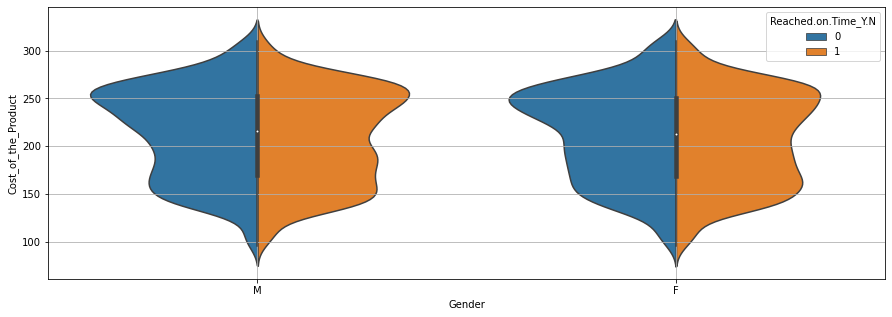

In [34]:
plt.figure (figsize =(15,5))

sns.violinplot (data = train,
                x= 'Gender',
                y=  'Cost_of_the_Product',
                hue ='Reached.on.Time_Y.N',
                # True일 경우 두 그룹을 하나의 바이올린 형태로 나타내줌
                split =True
             );
plt.grid()
# 150~200의 돈을 지불한 사람들에 물건이 제 시간에 도착하지 못했다.

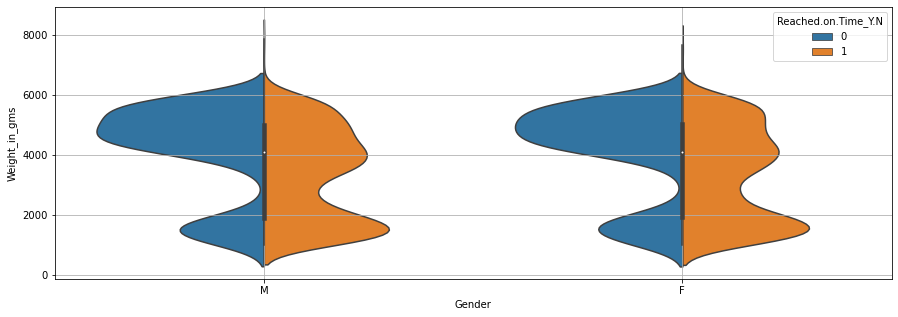

In [35]:
plt.figure (figsize =(15,5))

sns.violinplot (data = train,
                x= 'Gender',
                y= 'Weight_in_gms',
                hue ='Reached.on.Time_Y.N',
                # True일 경우 두 그룹을 하나의 바이올린 형태로 나타내줌
                split =True
             );
plt.grid()
# 2000부터 4000사이에 물건이 제 시간에 도착하지 못했다.

# 전처리

# train, test 데이터 분류

In [36]:
X_train = train.loc[:,:'Weight_in_gms']
y_train = train['Reached.on.Time_Y.N']
X_test = test

# 인코딩

In [37]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# 스케일링

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [40]:
X_train_Scaled = scaler.transform(X_train)
X_test_Scaled = scaler.transform(X_test)

# 모델 선정 및 학습

In [41]:
!pip install lightgbm

In [42]:
!pip install xgboost

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [44]:
# cv파라미터에 사용할 kfold값 설정
kfold = KFold(n_splits=10, random_state=123, shuffle=True)

In [45]:
# lightgbm 모델
lgbm_model = LGBMClassifier(n_estimators=1000, learning_rate=0.01, random_state=123)
lgbm_model.fit(X_train_Scaled, y_train)

LGBMClassifier(learning_rate=0.01, n_estimators=1000, random_state=123)

In [46]:
# 정확도 교차검증
acc_result = cross_val_score(lgbm_model,
                            X_train_Scaled,
                            y_train,
                            cv=kfold
                            )
print(acc_result.mean())

0.6518066625791947


In [47]:
# f1스코어 교차검증
f1_result = cross_val_score(lgbm_model,
                           X_train_Scaled,
                           y_train,
                           cv=kfold,
                           scoring='f1'
                           )
print(f1_result.mean())

0.6788372573034489


In [48]:
# xgboost 모델
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.01, random_state=123)
xgb_model.fit(X_train_Scaled, y_train)

[09:49:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\21SMT40\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1,
              random_state=123, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [49]:
# 정확도 교차검증
acc_result = cross_val_score(xgb_model,
                            X_train_Scaled,
                            y_train,
                            cv=kfold
                            )
print(acc_result.mean())

[09:49:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:49:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:49:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:49:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [50]:
# f1스코어 교차검증
f1_result = cross_val_score(xgb_model,
                           X_train_Scaled,
                           y_train,
                           cv=kfold,
                           scoring='f1'
                           )
print(f1_result.mean())

[09:49:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:49:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:49:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:49:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [51]:
# randomforest 모델

In [52]:
X_train_Scaled

array([[-0.58111355, -0.70655499, -1.5566352 , ..., -0.86184621,
        -0.997289  ,  0.997289  ],
       [ 0.94600049,  0.00263451,  0.30993669, ..., -0.86184621,
         1.00271837, -1.00271837],
       [-0.07207554, -1.41574448,  0.39289544, ..., -0.86184621,
        -0.997289  ,  0.997289  ],
       ...,
       [-1.59918958, -1.41574448,  1.86541326, ..., -0.86184621,
         1.00271837, -1.00271837],
       [-0.07207554, -1.41574448,  0.4551145 , ...,  1.16029982,
        -0.997289  ,  0.997289  ],
       [-0.07207554,  0.00263451,  1.07730513, ..., -0.86184621,
         1.00271837, -1.00271837]])

In [53]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=11)
rf_model.fit(X_train_Scaled, y_train)

RandomForestClassifier(random_state=11)

In [54]:
# 정확도 교차검증
acc_result = cross_val_score(rf_model,
                            X_train_Scaled,
                            y_train,
                            cv=kfold
                            )
print(acc_result.mean())

0.6383778867770283


In [55]:
# f1스코어 교차검증
f1_result = cross_val_score(rf_model,
                           X_train_Scaled,
                           y_train,
                           cv=kfold,
                           scoring='f1'
                           )
print(f1_result.mean())

0.6879819426827598


In [56]:
pre_lgbm=lgbm_model.predict(X_test_Scaled)

In [57]:
pre_xgb=xgb_model.predict(X_test_Scaled)

In [58]:
pre_rf=rf_model.predict(X_test_Scaled)

In [59]:
result_submission = pd.read_csv('data/sampleSubmission.csv')

In [60]:
result_submission['Reached.on.Time_Y.N'] = pre_xgb
result_submission.to_csv('submission_xgb.csv', index=False)

In [61]:
result_submission['Reached.on.Time_Y.N'] = pre_lgbm
result_submission.to_csv('submission_lgbm.csv', index=False)

In [62]:
result_submission['Reached.on.Time_Y.N'] = pre_rf
result_submission.to_csv('submission_rf.csv', index=False)

In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 6999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      6999 non-null   object 
 1   Mode_of_Shipment     6999 non-null   object 
 2   Customer_care_calls  6999 non-null   int64  
 3   Customer_rating      6999 non-null   int64  
 4   Cost_of_the_Product  6999 non-null   int64  
 5   Prior_purchases      6999 non-null   float64
 6   Product_importance   6999 non-null   object 
 7   Gender               6999 non-null   object 
 8   Weight_in_gms        6999 non-null   int64  
 9   Reached.on.Time_Y.N  6999 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 921.5+ KB


In [64]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 7000 to 10999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      4000 non-null   object 
 1   Mode_of_Shipment     4000 non-null   object 
 2   Customer_care_calls  4000 non-null   int64  
 3   Customer_rating      4000 non-null   int64  
 4   Cost_of_the_Product  4000 non-null   int64  
 5   Prior_purchases      4000 non-null   float64
 6   Product_importance   4000 non-null   object 
 7   Gender               4000 non-null   object 
 8   Weight_in_gms        4000 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 312.5+ KB
